In [13]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from src.data.DataLoader import get_dataset

# zuerst files die ich brauche temporär downloaden oder direkt laden mittels library, dann hat man es lokal
#      und von dort aus richtigen Pfad nehmen
# get out_dir (ist in den runs in out_dir eingespeichert)
# dann files öffnen
# in pd dataframes laden: pd.read_csv(out_dir + "/file")
# dann mit plot aus tutorial anzeigen lassenfrom 

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
#data_handler, d_args = get_handler_and_args("CIFAR10")
# S: Das sind die Roh-Daten, die (bzw. X_tr) müssen mit PCA oder Tsne transformiert werden. 
# Dann werden diese Daten im zweidimensionalen Raum geplottet 
X_tr, Y_tr, X_te, Y_te = get_dataset("CIFAR10")
rng = np.random.RandomState(0)
colors = rng.rand(10)
colors
len(Y_tr)

Files already downloaded and verified
Files already downloaded and verified


50000

In [14]:
Y_tr

tensor([6, 9, 9,  ..., 9, 1, 1])

In [15]:
path1 = 'bp_lmo/52cb83fe7df64b5baf369ee172b4194b'
path2 = 'bp_lmo/cf55da05f9014799a7ea6c4c6f189e8b'
path3 = 'bp_smo/9ab696d7bdad462e9fc2434c7c34eac6'
# S: das sind die die selektiert wurden, die müssen gehighlighted werden
sampled_data = pd.read_csv("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/" + path3 + "/0_statistics.csv")
sampled_data

,Unnamed: 0,img_id
0,0,48099
1,1,23599
2,2,13399
3,3,39885
4,4,7780
...,...,...
995,995,43358
996,996,32881
997,997,44565
998,998,39923


In [16]:
def label_scatter(data_points, sampled, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    print(num_classes)
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    #c=palette[labels.astype(np.int)
    weights_datapoints = np.arange(1, 11)
    weights_sampled = np.arange(1, len(sampled)+1)
    #c=label, cmap=matplotlib.colors.ListedColormap(colors)
    sc_data_points = ax.scatter(data_points[:,0], data_points[:,1], lw=0, s=40, c=labels, cmap='Greys')
    sc_sampled = ax.scatter(sampled[:,0], sampled[:,1], lw=0, s=40, c='red')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

#    for i in range(num_classes):

        # Position of each label at median of data points.

#        xtext, ytext = np.median(x[labels == i, :], axis=0)
#        txt = ax.text(xtext, ytext, str(i), fontsize=24)
#        txt.set_path_effects([
#            PathEffects.Stroke(linewidth=5, foreground="w"),
#            PathEffects.Normal()])
#        txts.append(txt)

    #return f, ax, sc_data_points, sc_sampled, txts


In [17]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA()
# S: hier vermutlich:
x = X_tr.reshape(X_tr.shape[0], -1)
print(x)

[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]


In [18]:
print(len(x))

50000


In [19]:
#sampled_data['img_id']
Sampled = X_tr[sampled_data['img_id']]
sampled = Sampled.reshape(Sampled.shape[0], -1)

In [20]:
pca_result_data_points = pca.fit_transform(x) 
#pca_result_sampled = pca.fit_transform(sampled_data)
print(pca_result_data_points)

[[-1.63225950e+03  6.95904885e+02  3.82936183e+02 ... -1.94383396e-01
  -2.96716275e-01 -8.91909421e-02]
 [ 2.11594763e+02 -2.42235521e+02  1.53095691e+03 ...  2.76508201e-02
   1.47062424e-01 -1.96606511e-01]
 [ 1.97120094e+03 -2.93813609e+03 -7.02173229e+02 ... -2.66373278e-01
  -5.45969636e-02 -1.00334729e-01]
 ...
 [ 1.80373380e+02 -2.89234292e+03 -1.00448294e+02 ... -9.69870999e-02
   4.75402487e-01  3.69202335e-01]
 [ 2.89881680e+03 -8.60874301e+02  1.41938040e+03 ... -1.19109692e-01
   1.89968105e-01 -4.26015893e-01]
 [ 1.06916310e+03 -3.01968063e+02 -1.13372056e+03 ...  2.46831906e-01
   6.12928127e-02 -7.15290870e-03]]


In [21]:
pca_result_sampled = pca.fit_transform(sampled)

In [22]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result_data_points[:,0]
pca_df['pca2'] = pca_result_data_points[:,1]
top_two_comp = pca_df[['pca1','pca2']]
print(top_two_comp)

              pca1         pca2
0     -1632.259496   695.904885
1       211.594763  -242.235521
2      1971.200943 -2938.136094
3     -2638.693419     2.738219
4      -669.541001 -1267.156173
...            ...          ...
49995  1812.039498 -1492.011111
49996  1585.305450   484.184848
49997   180.373380 -2892.342916
49998  2898.816799  -860.874301
49999  1069.163096  -301.968063

[50000 rows x 2 columns]


In [23]:
pca_df_sampled = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df_sampled['pca1'] = pca_result_sampled[:,0]
pca_df_sampled['pca2'] = pca_result_sampled[:,1]
top_two_comp_sampled = pca_df_sampled[['pca1','pca2']]
print(top_two_comp_sampled)

            pca1         pca2
0   -1782.969770  -305.016439
1     818.021030 -1368.319990
2    -573.086803  -924.147718
3     600.077504 -1564.338991
4    -634.820027  -814.050817
..           ...          ...
995  1991.842771  -287.520459
996   212.771859 -1048.946850
997   460.895884    97.990644
998  1353.097519 -1142.442184
999  1688.740071   770.364665

[1000 rows x 2 columns]


10
[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


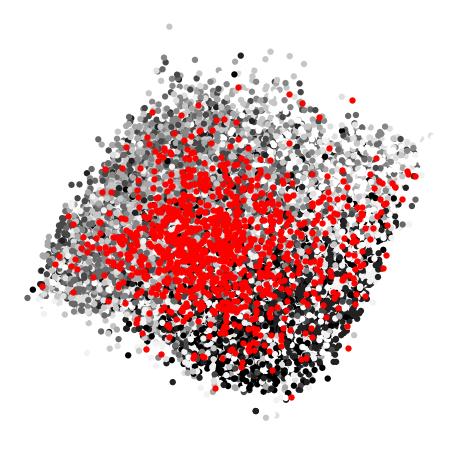

In [24]:
label_scatter(top_two_comp.values, top_two_comp_sampled.values, Y_tr)